Name: N.D.Liyanage
Index number: 190356E

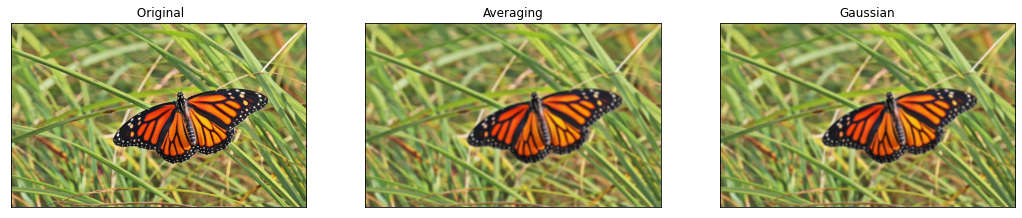

In [19]:
#Q1
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig = cv.imread('./images/butterfly.jpg',cv.IMREAD_COLOR)
assert img_orig is not None
kernel = np.ones((9,9),np.float32)/81
img_avg = cv.filter2D( img_orig,-1,kernel)
img_g = cv.GaussianBlur(img_orig, (9,9), 4)

img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_avg1 = cv.cvtColor(img_avg, cv.COLOR_BGR2RGB)
img_g1 = cv.cvtColor(img_g, cv.COLOR_BGR2RGB)
fig,axes = plt.subplots(1,3,sharex= 'all' , sharey='all',figsize = (18,18) )
axes[0].imshow(img_orig1)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(img_avg1)
axes[1].set_title('Averaging')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(img_g1)
axes[2].set_title('Gaussian')
axes[2].set_xticks([]),axes[2].set_yticks([])

plt.show()

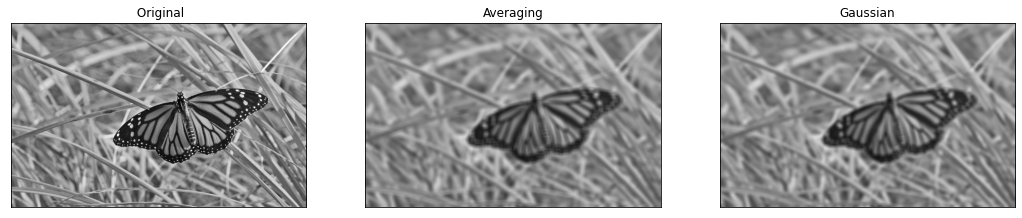

In [21]:
#Q1
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig = cv.imread('./images/butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img_orig is not None
kernel = np.ones((9,9))/81
img_avg = cv.filter2D( img_orig,-1,kernel)
img_g = cv.GaussianBlur(img_orig, (9,9), 4)

fig,axes = plt.subplots(1,3,sharex= 'all' , sharey='all',figsize = (18,18) )
axes[0].imshow(img_orig, cmap ='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(img_avg, cmap ='gray',vmin=0,vmax=255)
axes[1].set_title('Averaging')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(img_g, cmap ='gray',vmin=0,vmax=255)
axes[2].set_title('Gaussian')
axes[2].set_xticks([]),axes[2].set_yticks([])

plt.show()

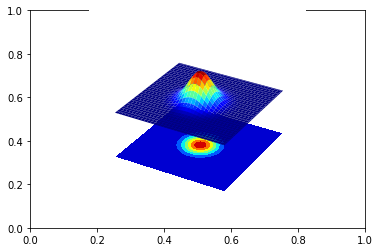

In [55]:
#Q2

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax  = plt.subplots()
ax = fig.add_subplot(111, projection = '3d')
sigma = 1
step = 0.1
X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)
XX, YY = np.meshgrid(X, Y)
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX, YY, g, cmap=cm.jet)
cset = ax.contourf(XX, YY, g, zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g) -2, np.max(g))
plt.axis('off')
plt.show()

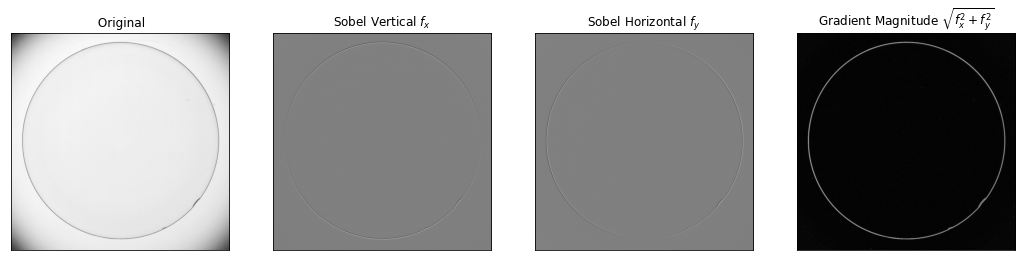

In [46]:
#Q3
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/contact_lens.tif',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None
sobelv_kernel = np.array([(-1,-2 ,-1), (0,0,0),(1,2,1)],dtype='float32')
img_x = cv.filter2D(img,-1, sobelv_kernel)
sobelh_kernel = np.array([(-1,0,1), (-2,0,2),(-1,0,1)],dtype='float32')
img_y = cv.filter2D(img,-1, sobelh_kernel)

grad_mag = np.sqrt(img_x**2+img_y**2)

fig,axes = plt.subplots(1,4,sharex= 'all' , sharey='all',figsize = (18,6))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(img_x,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('Sobel Vertical $f_x$')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(img_y,cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('Sobel Horizontal $f_y$')
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(grad_mag,cmap='gray')
axes[3].set_title('Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$')
axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()



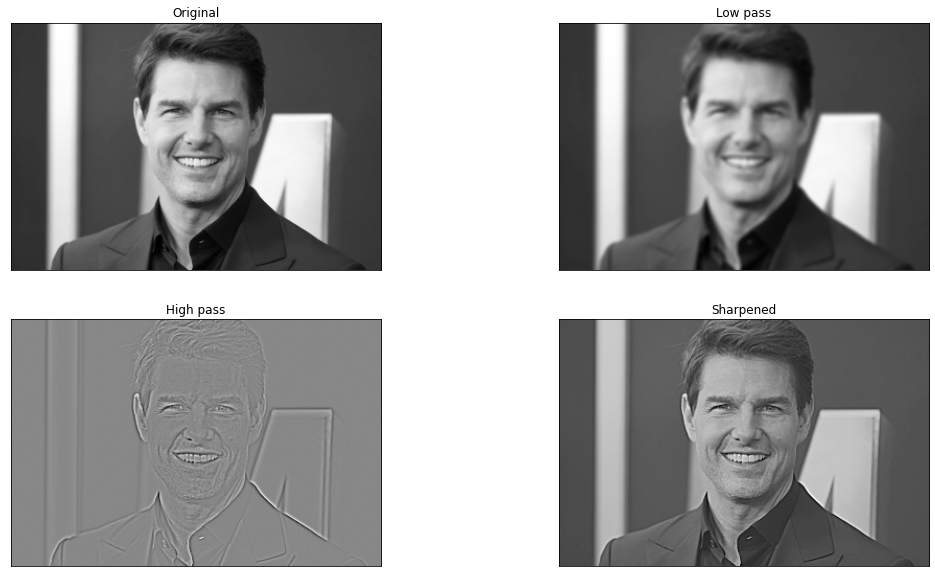

In [57]:
#Q4
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

img = cv.imread('./images/tom.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)

sigma = 2
gaussian_1d = cv.getGaussianKernel(5,sigma)
img_lp = cv.sepFilter2D(img, -1, gaussian_1d, gaussian_1d, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
img_hp = img.astype('float32') - img_lp.astype('float32')
sharpened = cv.addWeighted(img.astype('float32'), 1.0, img_hp, 1.5, 0)

fig,axes = plt.subplots(2,2,sharex= 'all' , sharey='all',figsize = (18,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].imshow(img_lp, cmap='gray')
axes[0,1].set_title('Low pass')
axes[0,1].set_xticks([]),axes[0,1].set_yticks([])
axes[1,0].imshow(img_hp, cmap='gray')
axes[1,0].set_title('High pass')
axes[1,0].set_xticks([]),axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]),axes[1,1].set_yticks([])
plt.show()

